# Epislon-Greedy

* Solution to the explore-exploit dilemma we'll use throughout the course
* Choose small number epsilon as probability of estimation

Eventually, we'll discove which arm is the true best since this allows us to update every arm's estimate. 

In [0]:
import random 

eps = 5
p = random.randint(1, 10)
if p < eps:
  pass
  # pull random arm
else:
  pass
  # pull current best arm

# Estimating Bandit Rewards 

* The best way to keep track of rewards is the mean.
* Also works for coin tosses since if you add up all the zeros and 1s and divide by N you'll arrive at the maximum likelihood probability. 
* The problem is that this requires you to store all N elements in order to calculate the mean 
* This can be improved because the mean of the new sample can be calculated by the mean of the old sample


Example in Supervised learning:

In [0]:
class myModel:
  def fit(x, y):
    pass
  def predict(x):
    pass

Xtrain, Ytrain, Xtest, Ytest = get_data()   #1. Get data
model = myModel()    #2. Instantiate model
model.fit(Xtrain, Ytrain)    #3. Train model
model.score(Xtest, Ytest)    #4. Evaluate model

In [0]:
# Casino Machine
class MyAwesomeCasinoMachine:
  def pull():
    pass
    # simulates drawing from the true distribution
    # which you wouldn't know in real life
    
for t in range(max_iterations):
  # pick a casino machine to play based on algorithm 
  # update algorithm parameters
  
# plot useful info (avg reward, best rewards)

# Comparing Epsillon

In [0]:
import numpy as np 
import matplotlib.pyplot as plt

class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0
  
  def pull(self):
    return np.random.randn() + self.m
  
  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N) * self.mean + 1.0/self.N*x

In [0]:
def run_expriement(m1, m2, m3, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
  
  data = np.empty(N)
  
  for i in range(N):
    # epsilon greedy
    
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
    else:
      j = np.argmax([b.mean for b in bandits])  # best current sample mean
    x = bandits[j].pull()
    bandits[j].update(x)
    
    # for the plot
    data[i] = x
  
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
  
  # plot moving average ctl
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()
  
  
  for b in bandits:
    print(b.mean)
  
  return cumulative_average



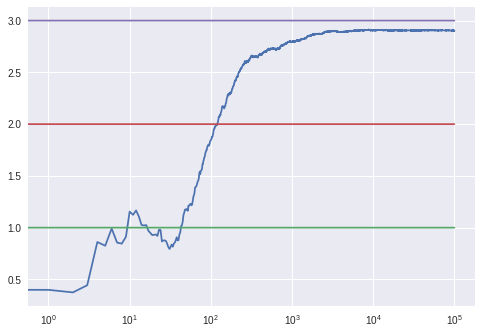

0.9729992217169399
2.02936696989023
3.0037848900622404


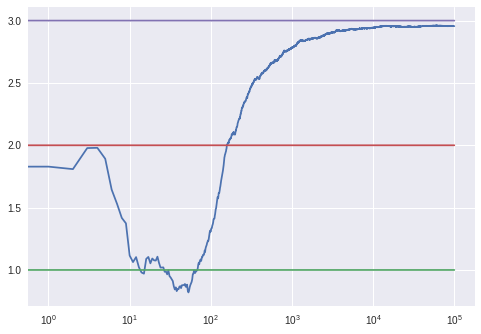

1.018511776796271
1.9548019031527029
3.007104191360427


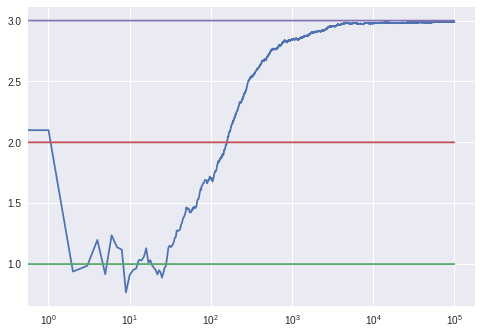

0.8545482377817926
1.9311791476769014
3.003076757312274


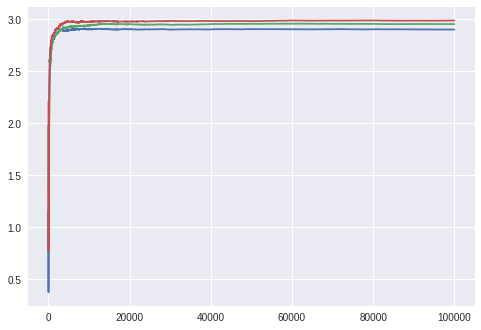

In [0]:
if __name__ == '__main__':
  c_1 = run_expriement(1.0, 2.0, 3.0, 0.1, 100000)
  c_05 = run_expriement(1.0, 2.0, 3.0, 0.05, 100000)
  c_01 = run_expriement(1.0, 2.0, 3.0, 0.01, 100000)
  
  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')

## Clarifications

*   Pull is actually pulling from the bandit arm of a slot machine in a casino, it's drawing a sample from the true distribution of the bandit. 
*   The graph shows average reward so far vs iteration


## Results
*   Having an epsillon greater than 0 yields suboptimal reward since it requires the agent to explore suboptimal options
*   The lowest epsilon looks to have spent most time exploring suboptimal bandits. 


## Further investigation
* In the following code, using different epsillon values. 


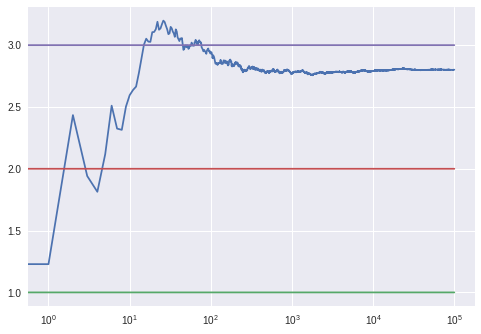

1.0060600457722113
2.0046879657155046
3.0040510226343096


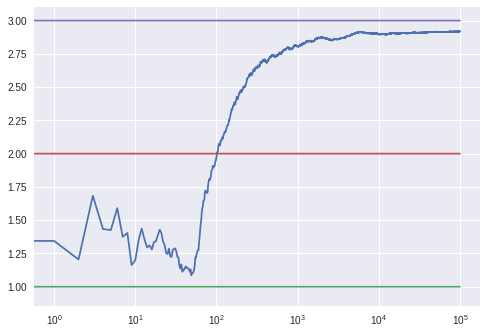

1.034595980269347
1.956817875348569
2.999981081025863


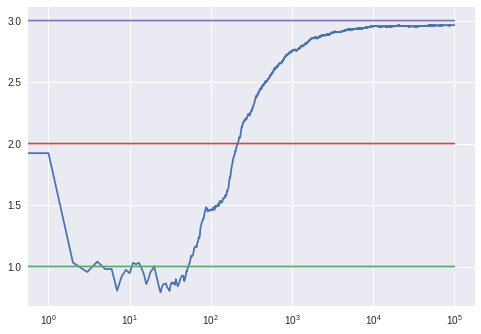

0.9861895655797551
2.020640907674673
2.995403502683936


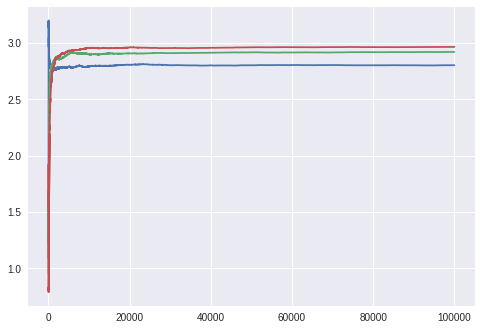

In [0]:
if __name__ == '__main__':
  c_2 = run_expriement(1.0, 2.0, 3.0, 0.2, 100000)
  c_08 = run_expriement(1.0, 2.0, 3.0, 0.08, 100000)
  c_03 = run_expriement(1.0, 2.0, 3.0, 0.03, 100000)
  
  # log scale plot
  plt.plot(c_2, label='eps = 0.2')
  plt.plot(c_08, label='eps = 0.08')
  plt.plot(c_03, label='eps = 0.03')

## Optimistic Initial Values

*    Another Simple way of solving explore-exploit dilemma 
*    Pick a high ceiling as the initial value estimate
*    The initial mean is "too good to be true"
*    All collected data will cause it to go down


In [0]:
import numpy as np 
import matplotlib.pyplot as plt

class Bandit:
  def __init__(self, m, upper_limit):
    self.m = m
    self.mean = upper_limit
    self.N = 1
  
  def pull(self):
    return np.random.randn() + self.m
  
  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N) * self.mean + 1.0/self.N*x

In [0]:
def run_expriement(m1, m2, m3, eps, N, upper_limit=10):
  bandits = [Bandit(m1, upper_limit), Bandit(m2, upper_limit), Bandit(m3, upper_limit)]
  
  data = np.empty(N)
  
  for i in range(N):
    # epsilon greedy
    j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)
    
    # for the plot
    data[i] = x
  
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
  
  # plot moving average ctl
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()
  
  
  for b in bandits:
    print(b.mean)
  
  return cumulative_average



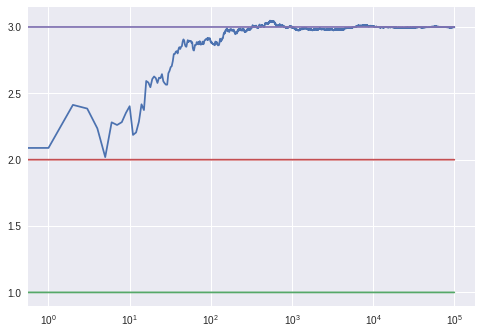

2.825991362035047
2.9250317078331576
2.997938229770787


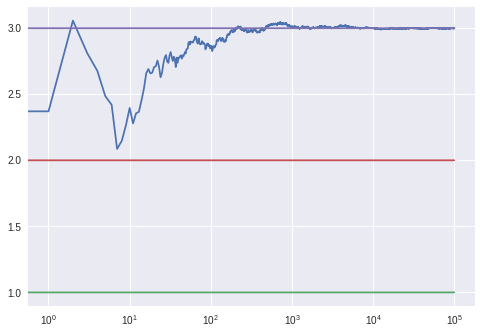

2.733616713455189
2.990654938148049
2.9991271373178403


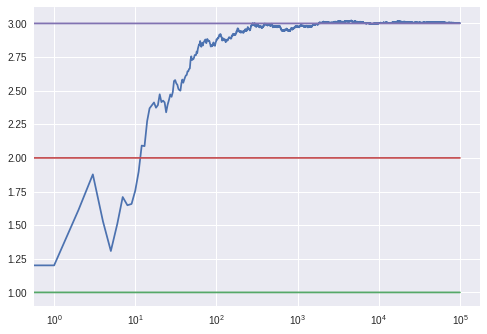

2.771128523504352
2.9063726974101773
3.0030829974252633


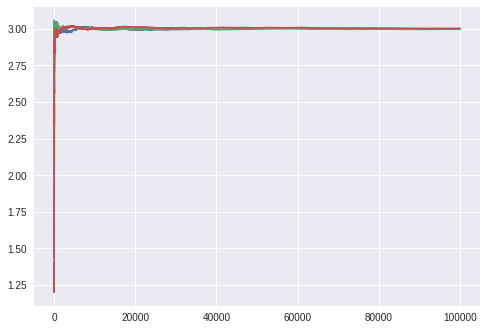

In [0]:
if __name__ == '__main__':
  c_1 = run_expriement(1.0, 2.0, 3.0, 0.1, 100000)
  c_05 = run_expriement(1.0, 2.0, 3.0, 0.05, 100000)
  c_01 = run_expriement(1.0, 2.0, 3.0, 0.01, 100000)
  
  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')

## UCB1

*   Another method to solve explore-exploit (also known as A/B testing class)
*   Confidence bounds 
*   We know that a sample mean from 10 samples is less accurate than a sample mean from 1000 samples
*   If ln(N) grows more slowly than Nj, so eventually all upper bounds will shrink

In [0]:
import numpy as np 
import matplotlib.pyplot as plt

class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0
  
  def pull(self):
    return np.random.randn() + self.m
  
  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N) * self.mean + 1.0/self.N*x
    
def ucb(mean, n, nj):
  if nj == 0:
    return float('inf')
  return mean + np.sqrt(2*np.log(n) / nj)

In [0]:
def run_expriement(m1, m2, m3, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
  
  data = np.empty(N)
  
  for i in range(N):
    j = np.argmax([ucb(b.mean, i+1, b.N) for b in bandits]) 
    x = bandits[j].pull()
    bandits[j].update(x)
    
    # for the plot
    data[i] = x
  
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
  
  # plot moving average ctl
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()
  
  
  for b in bandits:
    print(b.mean)
  
  return cumulative_average



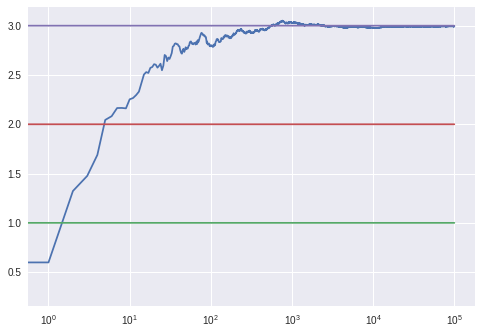

0.3113452060428841
1.8683773641865253
2.994392656582269


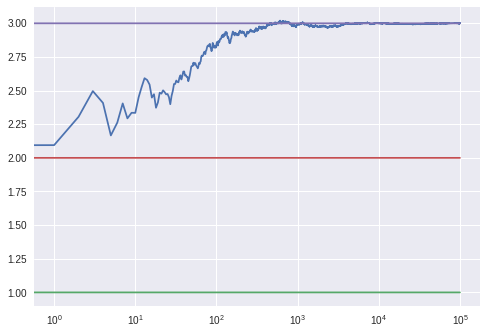

1.4525644275329312
2.214039563645289
3.000358036494076


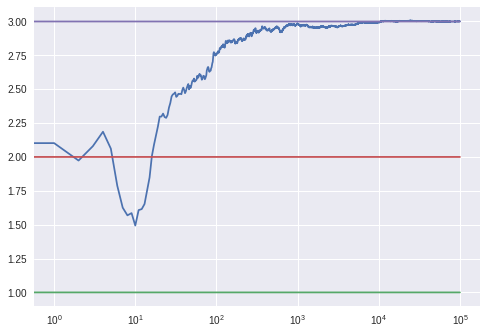

1.0329614548025694
2.116370364150754
3.0017194512275593


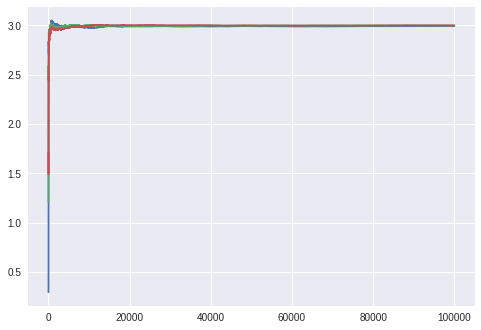

In [0]:
if __name__ == '__main__':
  c_1 = run_expriement(1.0, 2.0, 3.0, 0.1, 100000)
  c_05 = run_expriement(1.0, 2.0, 3.0, 0.05, 100000)
  c_01 = run_expriement(1.0, 2.0, 3.0, 0.01, 100000)
  
  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')

# Bayesian method

*   Thompson sampling
*    Central Limit theorem says that the sample mean is approximately Gaussian 
*    u becomes a random variable as well
*    Flip the posterior to find it in terms of likelihood and prior 
*    Problem: integral is usually intractable, we need "tricks" to solve this
*    We take the argmax of our samples of each bandit


Demo:

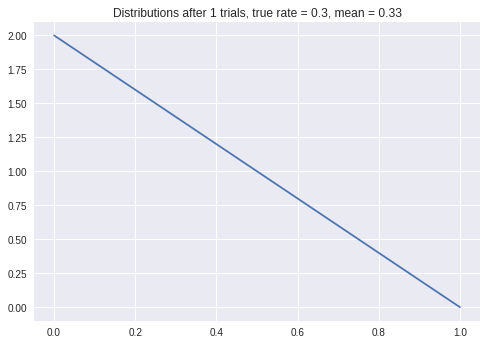

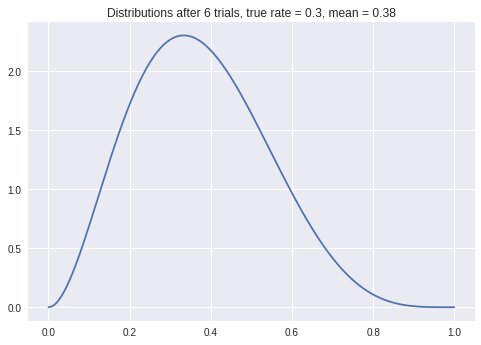

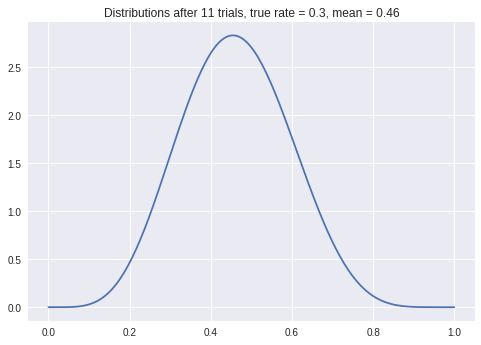

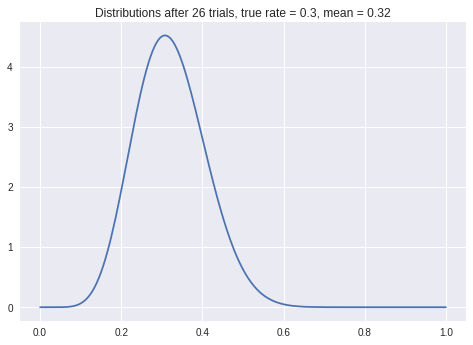

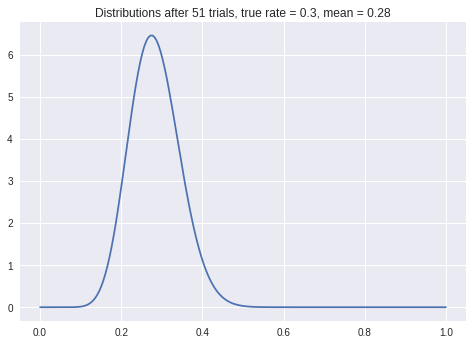

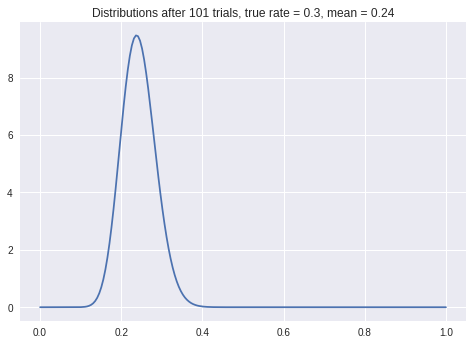

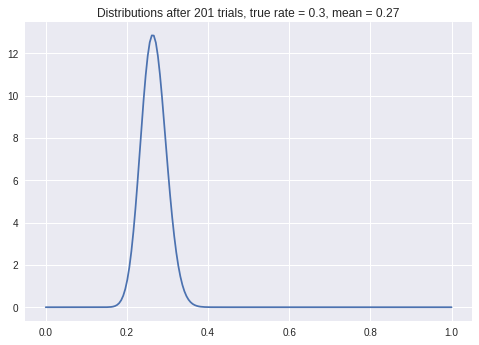

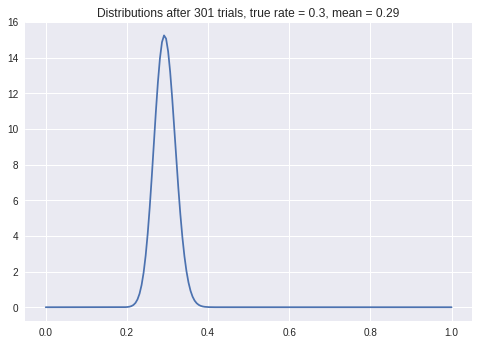

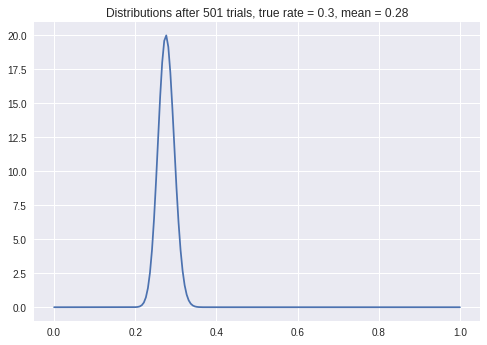

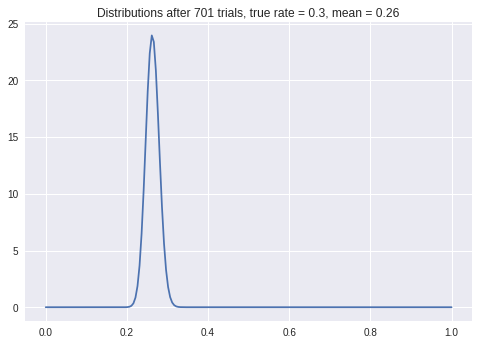

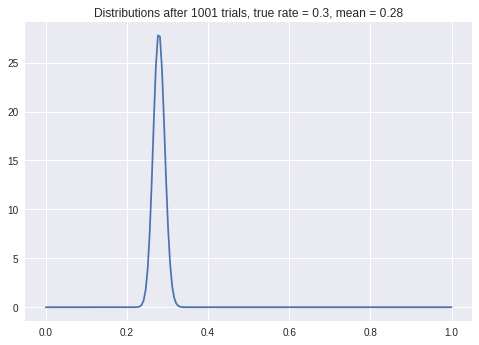

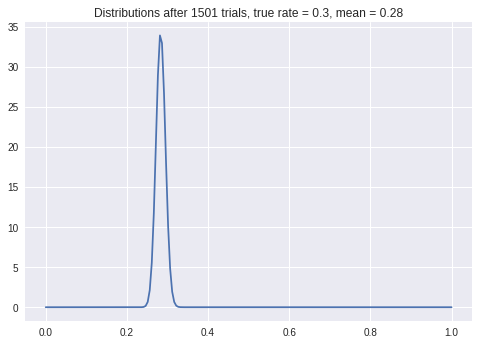

In [0]:
# From the course: Bayesin Machine Learning in Python: A/B Testing
# https://deeplearningcourses.com/c/bayesian-machine-learning-in-python-ab-testing
# https://www.udemy.com/bayesian-machine-learning-in-python-ab-testing
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def plot(a, b, trial, ctr):
  x = np.linspace(0, 1, 200)
  y = beta.pdf(x, a, b)
  mean = float(a) / (a + b)
  plt.plot(x, y)
  plt.title("Distributions after %s trials, true rate = %.1f, mean = %.2f" % (trial, ctr, mean))
  plt.show()

true_ctr = 0.3
a, b = 1, 1 # beta parameters
show = [0, 5, 10, 25, 50, 100, 200, 300, 500, 700, 1000, 1500]
for t in range(1501):
  coin_toss_result = (np.random.random() < true_ctr)
  if coin_toss_result:
    a += 1
  else:
    b += 1

  if t in show:
    plot(a, b, t+1, true_ctr)

*   The distribution of CTR gets skinner/taller as we collect data
*   This is because we're becoming more confident in that estimate/variance decreases
*   Distribution becomes more precise after every coin toss, not just after we collect all data

# Techniques

1. Epsilon-greedy
2. Optimistic initial Values
3. UCB1
4. Thompson Sampling

The code for comparing the method is in the jupyter notebook 

# Non-stationary Bandits

*  A stationary process is one whose statistics don't change over time
* Weak-sense stationary: mean and autocovariable don't change over time
* Strong-sense stationary: entire pdf doesn't change over time

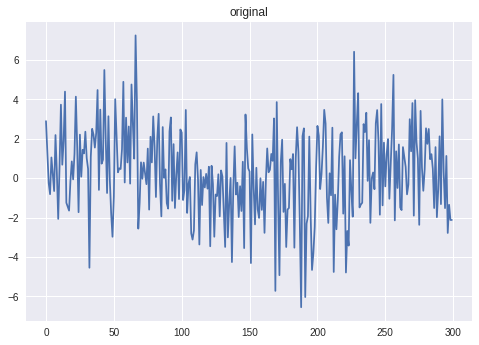

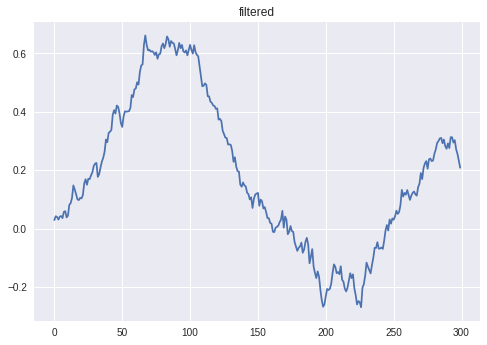

In [0]:
# https://deeplearningcourses.com/c/unsupervised-machine-learning-hidden-markov-models-in-python
# https://udemy.com/unsupervised-machine-learning-hidden-markov-models-in-python
# http://lazyprogrammer.me
# theano scan example - low pass filter

# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import matplotlib.pyplot as plt
import theano
import theano.tensor as T


X = 2*np.random.randn(300) + np.sin(np.linspace(0, 3*np.pi, 300))
plt.plot(X)
plt.title("original")
plt.show()

decay = T.scalar('decay')
sequence = T.vector('sequence')

def recurrence(x, last, decay):
  return (1-decay)*x + decay*last

outputs, _ = theano.scan(
  fn=recurrence,
  sequences=sequence,
  n_steps=sequence.shape[0],
  outputs_info=[np.float64(0)],
  non_sequences=[decay]
)

lpf = theano.function(
  inputs=[sequence, decay],
  outputs=outputs,
)

Y = lpf(X, 0.99)
plt.plot(Y)
plt.title("filtered")
plt.show()